# To do list

- Revisar los nombres de las variables 
- Hacer One hot encoding 
- Revisar df_normalizado
- Arreglar df_limpio
- Codificar datos
- Revisar comentarios e ir documentando

## Integrantes

Moresco Brisa

Britos Julián Francisco

## Librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


# De scikit-learn...

## Carga de datos

In [2]:
### Carga datos de dataset
### Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
### tras observar los datos del día de hoy, el objetivo es predecir las variables target:
###                                                                                     -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
###                                                                                     -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

## Visualización de datos

In [3]:
### Vista de datos
df.head()

Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0           0  2008-12-01   Albury     13.4     22.9       0.6          NaN   
1           1  2008-12-02   Albury      7.4     25.1       0.0          NaN   
2           2  2008-12-03   Albury     12.9     25.7       0.0          NaN   
3           3  2008-12-04   Albury      9.2     28.0       0.0          NaN   
4           4  2008-12-05   Albury     17.5     32.3       1.0          NaN   

   Sunshine WindGustDir  WindGustSpeed  ... Humidity3pm Pressure9am  \
0       NaN           W           44.0  ...        22.0      1007.7   
1       NaN         WNW           44.0  ...        25.0      1010.6   
2       NaN         WSW           46.0  ...        30.0      1007.6   
3       NaN          NE           24.0  ...        16.0      1017.6   
4       NaN           W           41.0  ...        33.0      1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       NaN     16.9     21.8         No            No   
1       1007.8       NaN       NaN     17.2     24.3         No            No   
2       1008.7       NaN       2.0     21.0     23.2         No            No   
3       1012.8       NaN       NaN     18.1     26.5         No            No   
4       1006.0       7.0       8.0     17.8     29.7         No            No   

   RainfallTomorrow  
0               0.0  
1               0.0  
2               0.0  
3               1.0  
4               0.2  

[5 rows x 25 columns]

In [4]:
### Columnas, ¿cuáles son variables numéricas y cuales variables categóricas?
df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [5]:
df.describe()

Unnamed: 0        MinTemp        MaxTemp       Rainfall  \
count  145412.000000  143928.000000  144159.000000  142152.000000   
mean    72728.184393      12.195873      23.223176       2.361516   
std     41990.722236       6.398018       7.118770       8.479338   
min         0.000000      -8.500000      -4.800000       0.000000   
25%     36362.750000       7.600000      17.900000       0.000000   
50%     72727.500000      12.000000      22.600000       0.000000   
75%    109093.250000      16.900000      28.200000       0.800000   
max    145458.000000      33.900000      48.100000     371.000000   

        Evaporation      Sunshine  WindGustSpeed   WindSpeed9am  \
count  82658.000000  75616.000000  135159.000000  143645.000000   
mean       5.468616      7.611241      40.036564      14.044742   
std        4.193871      3.785612      13.607212       8.915610   
min        0.000000      0.000000       6.000000       0.000000   
25%        2.600000      4.800000      31.000000       7.000000   
50%        4.800000      8.400000      39.000000      13.000000   
75%        7.400000     10.600000      48.000000      19.000000   
max      145.000000     14.500000     135.000000     130.000000   

        WindSpeed3pm    Humidity9am    Humidity3pm    Pressure9am  \
count  142351.000000  142759.000000  140907.000000  130351.000000   
mean       18.663164      68.877290      51.537432    1017.649277   
std         8.810276      19.029576      20.796720       7.107132   
min         0.000000       0.000000       0.000000     980.500000   
25%        13.000000      57.000000      37.000000    1012.900000   
50%        19.000000      70.000000      52.000000    1017.600000   
75%        24.000000      83.000000      66.000000    1022.400000   
max        87.000000     100.000000     100.000000    1041.000000   

         Pressure3pm      Cloud9am      Cloud3pm        Temp9am  \
count  130388.000000  89542.000000  86076.000000  143646.000000   
mean     1015.255184      4.447287      4.509770      16.992780   
std         7.037981      2.887161      2.720306       6.488045   
min       977.100000      0.000000      0.000000      -7.200000   
25%      1010.400000      1.000000      2.000000      12.300000   
50%      1015.200000      5.000000      5.000000      16.700000   
75%      1020.000000      7.000000      7.000000      21.600000   
max      1039.600000      9.000000      9.000000      40.200000   

             Temp3pm  RainfallTomorrow  
count  141805.000000     142153.000000  
mean       21.685249          2.361242  
std         6.936358          8.479084  
min        -5.400000          0.000000  
25%        16.600000          0.000000  
50%        21.100000          0.000000  
75%        26.400000          0.800000  
max        46.700000        371.000000

In [6]:
### Cantidad de valores faltantes.
df.isna().sum()

Unnamed: 0              0
Date                    0
Location                0
MinTemp              1484
MaxTemp              1253
Rainfall             3260
Evaporation         62754
Sunshine            69796
WindGustDir         10316
WindGustSpeed       10253
WindDir9am          10562
WindDir3pm           4226
WindSpeed9am         1767
WindSpeed3pm         3061
Humidity9am          2653
Humidity3pm          4505
Pressure9am         15061
Pressure3pm         15024
Cloud9am            55870
Cloud3pm            59336
Temp9am              1766
Temp3pm              3607
RainToday            3260
RainTomorrow         3259
RainfallTomorrow     3259
dtype: int64

In [7]:
#Tipos de variables
df.dtypes

Unnamed: 0            int64
Date                 object
Location             object
MinTemp             float64
MaxTemp             float64
Rainfall            float64
Evaporation         float64
Sunshine            float64
WindGustDir          object
WindGustSpeed       float64
WindDir9am           object
WindDir3pm           object
WindSpeed9am        float64
WindSpeed3pm        float64
Humidity9am         float64
Humidity3pm         float64
Pressure9am         float64
Pressure3pm         float64
Cloud9am            float64
Cloud3pm            float64
Temp9am             float64
Temp3pm             float64
RainToday            object
RainTomorrow         object
RainfallTomorrow    float64
dtype: object

## Outliers

In [ ]:
# Initialize a scaler
scaler = MinMaxScaler()

# Fit the scaler to the dataframe and transform the dataframe
df_loco = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Unnamed: 0', 'Date', 'Location', 
                                'WindGustDir', 'WindDir9am', 'WindDir3pm', 
                                'RainToday', 'RainTomorrow', 'RainfallTomorrow'])), columns=df.drop(columns=['Unnamed: 0', 'Date', 'Location', 
                                'WindGustDir', 'WindDir9am', 'WindDir3pm', 
                                'RainToday', 'RainTomorrow', 'RainfallTomorrow']).columns)

# Create a new DataFrame where each row is a variable and each column is an observation
df_melted = df_normalized.melt()

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(27, 10))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    df_melted, x="value", y="variable", hue="variable",
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(df_melted, x="value", y="variable", size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

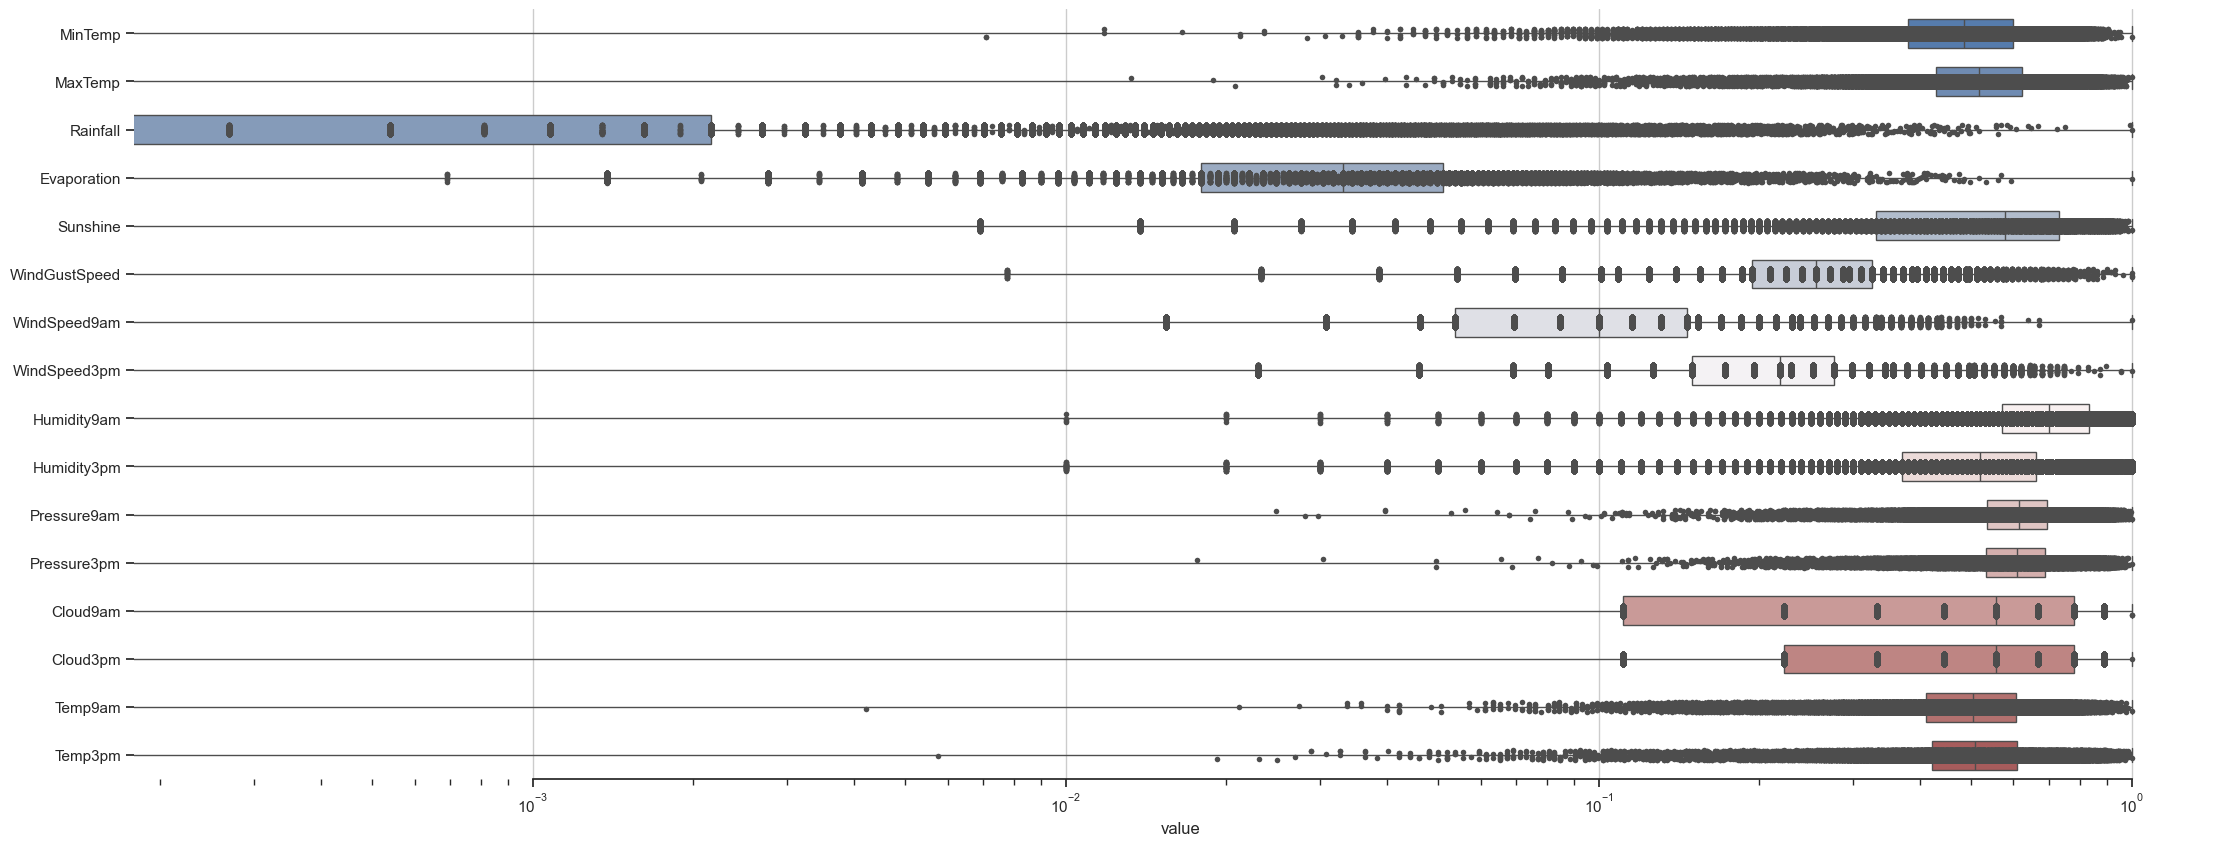

In [47]:
# Initialize a scaler
scaler = MinMaxScaler()

# Fit the scaler to the dataframe and transform the dataframe
df_normalized = pd.DataFrame(scaler.fit_transform(df.drop(columns=['Unnamed: 0', 'Date', 'Location', 
                                'WindGustDir', 'WindDir9am', 'WindDir3pm', 
                                'RainToday', 'RainTomorrow', 'RainfallTomorrow'])), columns=df.drop(columns=['Unnamed: 0', 'Date', 'Location', 
                                'WindGustDir', 'WindDir9am', 'WindDir3pm', 
                                'RainToday', 'RainTomorrow', 'RainfallTomorrow']).columns)

# Create a new DataFrame where each row is a variable and each column is an observation
df_melted = df_normalized.melt()

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(27, 10))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    df_melted, x="value", y="variable", hue="variable",
    whis=[0, 100], width=.6, palette="vlag"
)

# Add in points to show each observation
sns.stripplot(df_melted, x="value", y="variable", size=4, color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

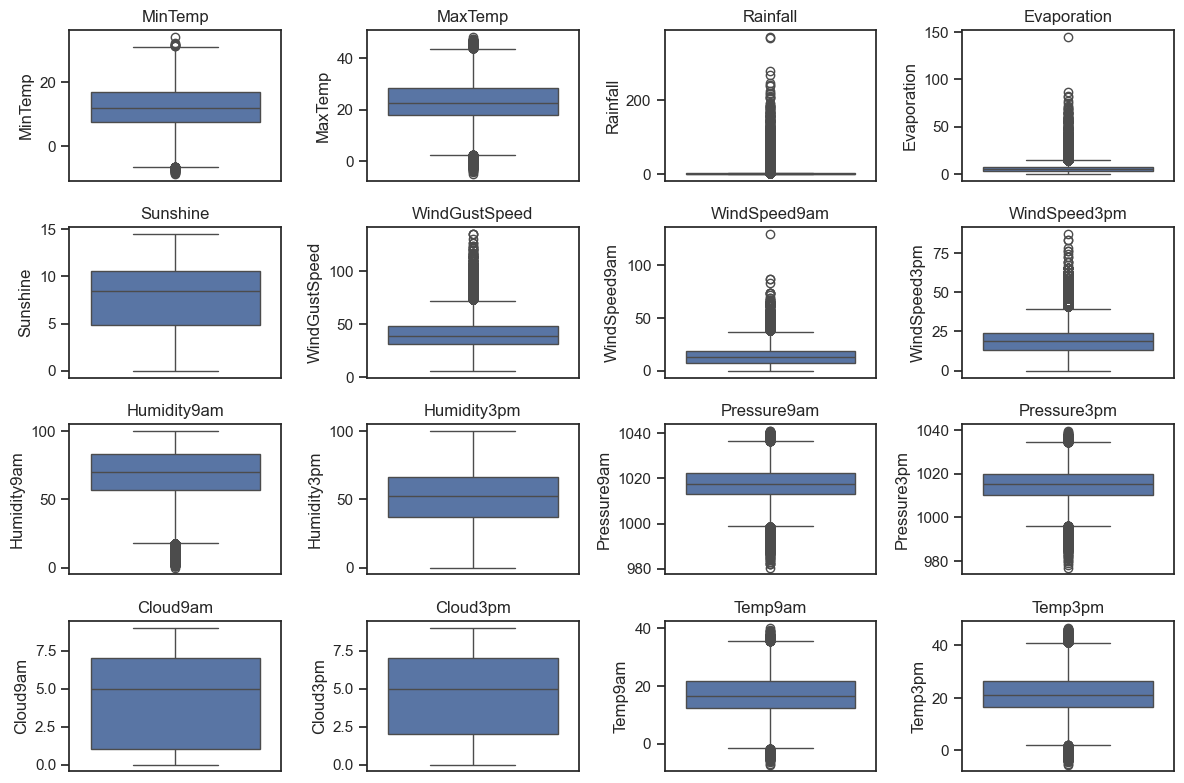

In [43]:
# Graficamos los boxplots de las columnas numéricas para ver si hay outliers
plt.figure(figsize=(12,8))
for i, column in enumerate(df_normalized.columns):
    plt.subplot(4, 4, i+1)  
    sns.boxplot(df[column])
    plt.title(column)
    plt.xticks([])
plt.tight_layout()
plt.show()

Vemos como pareciera haber datos atipicos en las columnas MinTemp, MaxTemp, Evaporation, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Pressure9am, Pressure3pm, Temp9am y Temp3pm. Ademas vemos en Rainfall que no hay boxplot. 

SIn embargo al ver un poco mas de cerca los datos como por ejemplo MinTemp ocurre lo sigueinte:

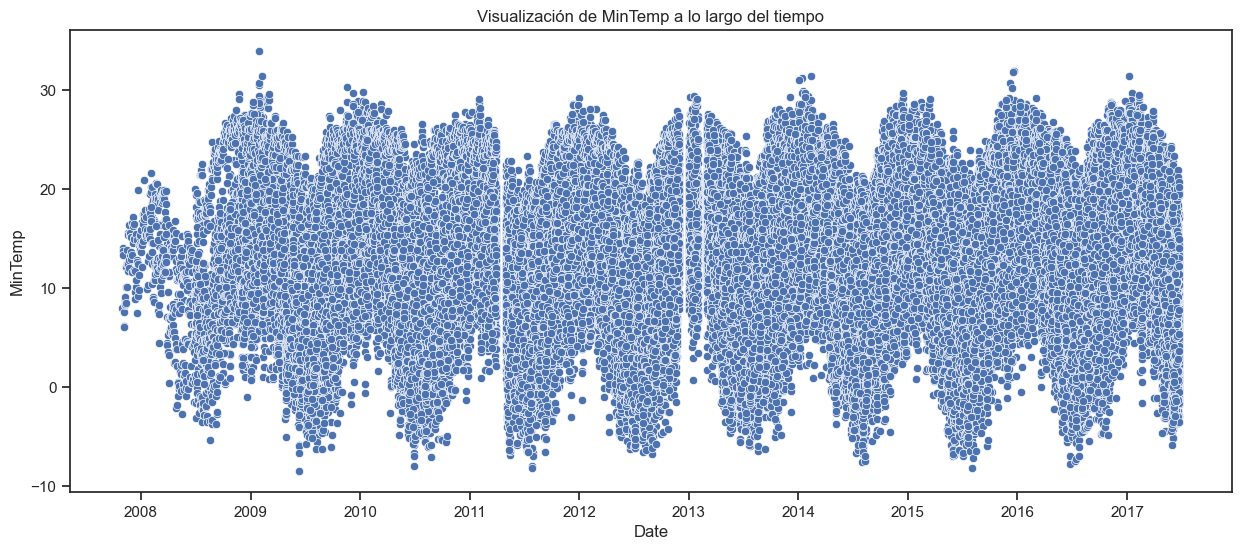

In [11]:
# Nos aseguramos que Date este en formato tiempo 
df['Date'] = pd.to_datetime(df['Date'])

columna = 'MinTemp'  # reemplaza esto con la columna que deseas visualizar

plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y=columna, data=df) 
plt.title('Visualización de ' + columna + ' a lo largo del tiempo')
plt.show()

Vemos como no hay realmente datos atipicos y ademas podemos observar lineas rectas de datos faltantes en varios lugares.

Sabiendo este tendremos que corroborar uno por uno de las columnas mencionadas anteriormente donde pareciera haber outliers para asegurarnos de que sea asi y no pase como en MinTemp donde hay falsos outliers

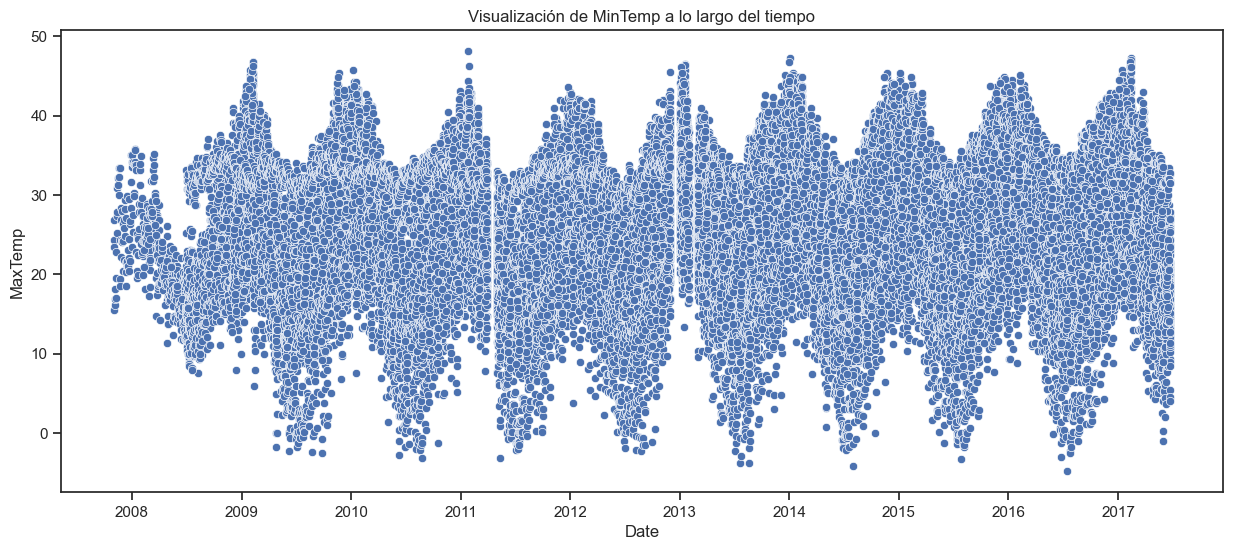

In [12]:
# Nos aseguramos que Date este en formato tiempo 
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y='MaxTemp', data=df)
plt.title('Visualización de ' + columna + ' a lo largo del tiempo')
plt.show()

Vemos que aligual que en MinTemp son falsos outliers

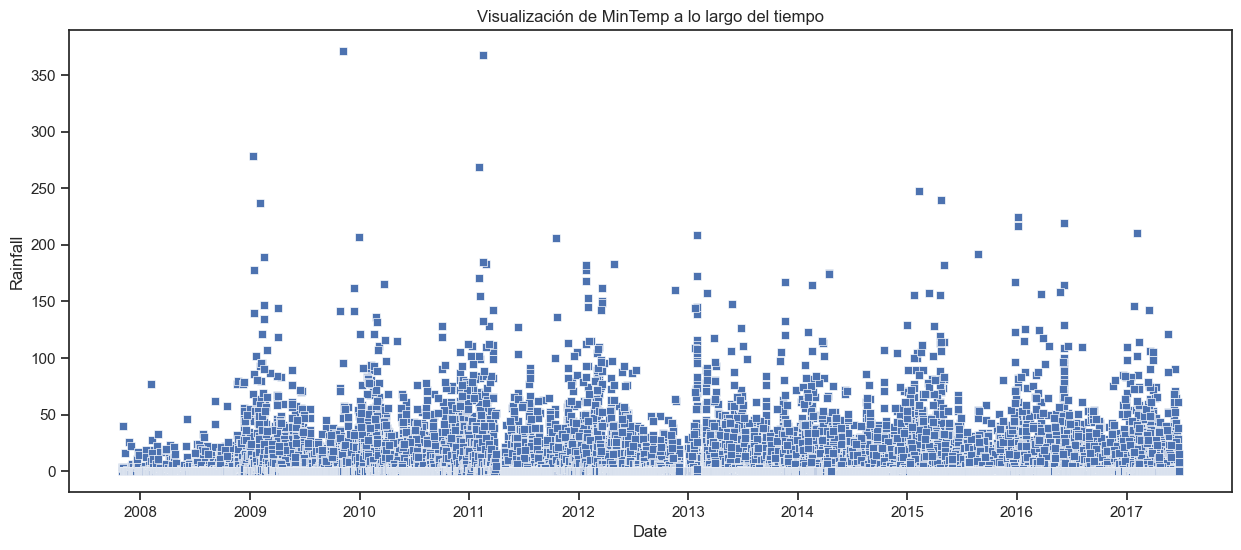

In [13]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y='Rainfall',data=df, marker = "s")
plt.title('Visualización de ' + columna + ' a lo largo del tiempo')
plt.show()

Vemos como Rainfall si tiene outlier 


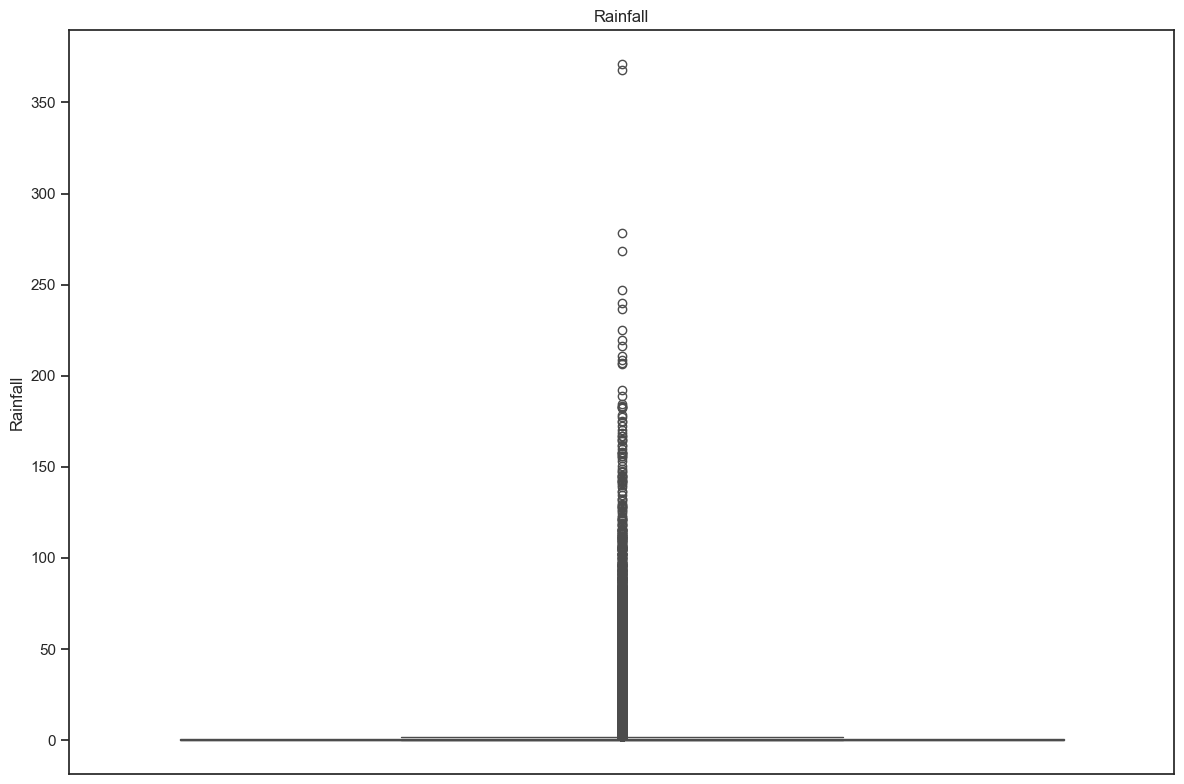

In [14]:
plt.figure(figsize=(12,8)) 
sns.boxplot(df['Rainfall'])
plt.title('Rainfall')
plt.xticks([])
plt.tight_layout()
plt.show()


Porque no tiene boxplot?

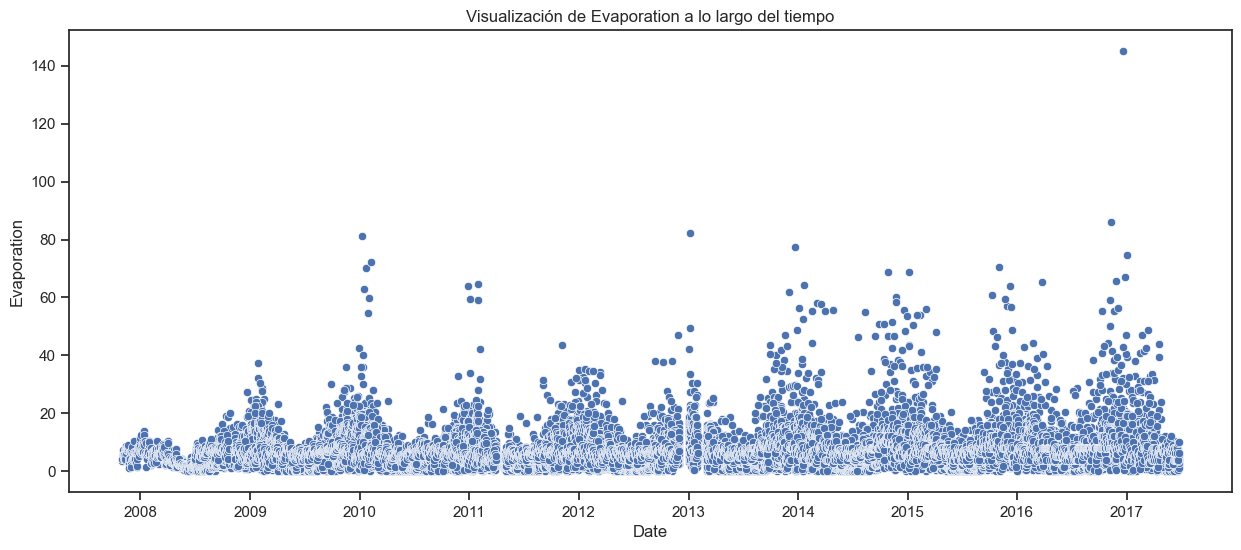

In [15]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y='Evaporation', data=df)
plt.title('Visualización de Evaporation a lo largo del tiempo')
plt.show()

Vemos como solo tiene un outlier

In [36]:
df_limpio = df.copy()

In [37]:
df_limpio.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [38]:
# Supongamos que df es tu DataFrame

# Define el umbral para eliminar los valores atípicos (por ejemplo, 100)
threshold = 100

# Identifica los valores atípicos en la columna 'Evaporation'
outliers = df_normalized['Evaporation'] > threshold

# Elimina las filas con valores atípicos de la columna 'Evaporation'
df_limpio = df[~outliers]

df_limpio = [Evaporation, WindSpeed9am]

# Supongamos que df es tu DataFrame

# Define el umbral para eliminar los valores atípicos (por ejemplo, 100)
threshold = 120

# Identifica los valores atípicos en la columna 'Evaporation'
outliers = df['WindSpeed9am'] > threshold

# Elimina las filas con valores atípicos de la columna 'Evaporation'
df_limpio = df[~outliers]


df_limpio = [WindSpeed9am]


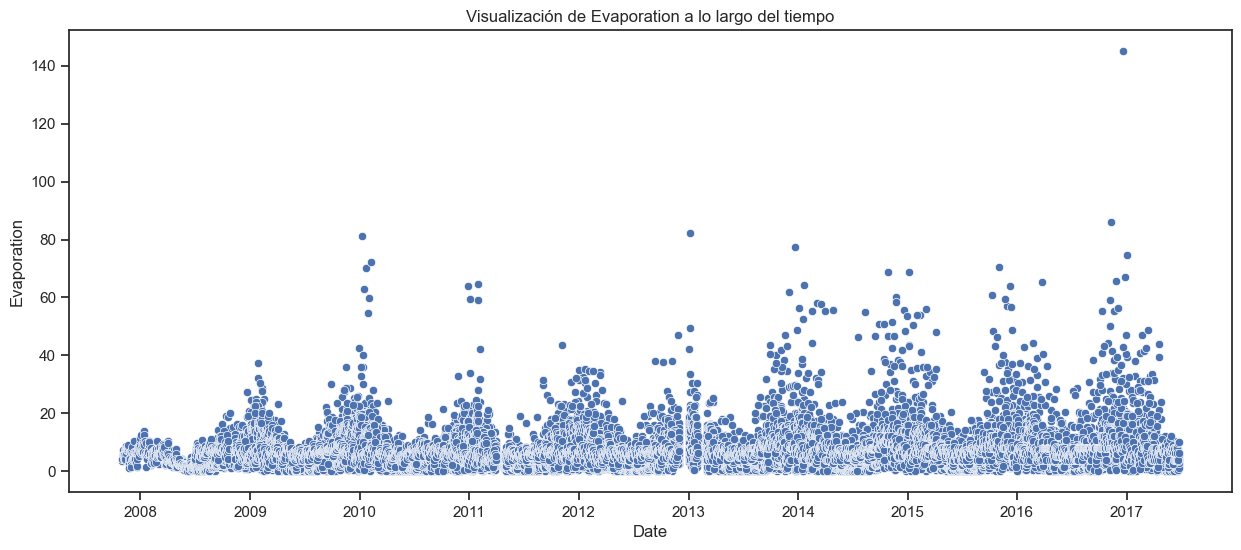

In [39]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y='Evaporation', data=df_limpio)
plt.title('Visualización de Evaporation a lo largo del tiempo')
plt.show()

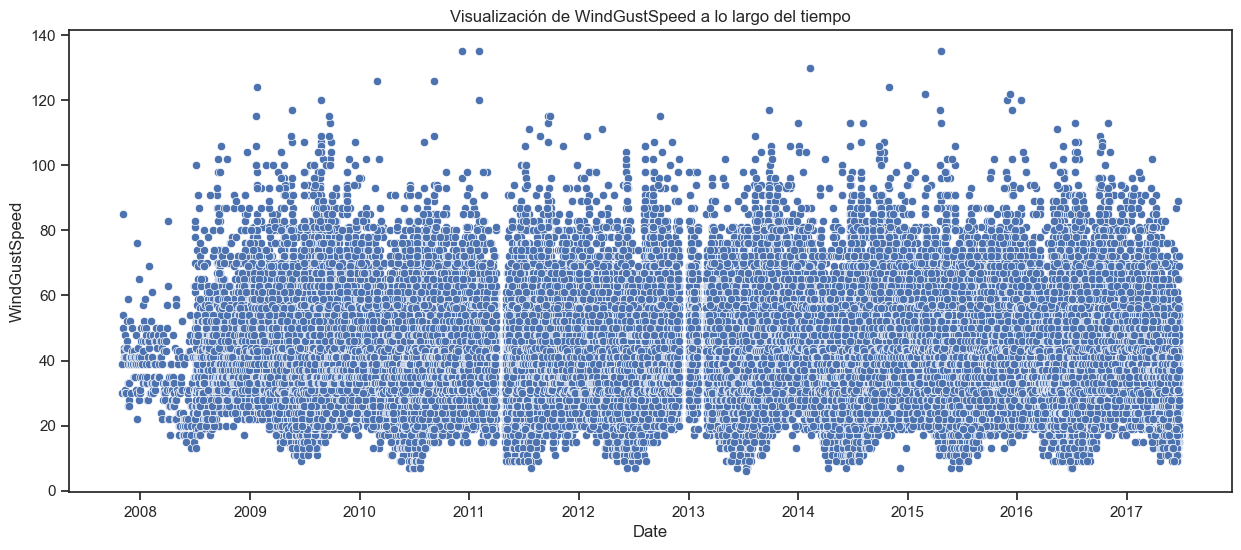

In [18]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y='WindGustSpeed', data=df)
plt.title('Visualización de WindGustSpeed a lo largo del tiempo')
plt.show()

No tiene outliers

In [32]:
# Supongamos que df es tu DataFrame

# Define el umbral para eliminar los valores atípicos (por ejemplo, 100)
threshold = 120

# Identifica los valores atípicos en la columna 'Evaporation'
outliers = df['WindSpeed9am'] > threshold

# Elimina las filas con valores atípicos de la columna 'Evaporation'
df_limpio = df[~outliers]


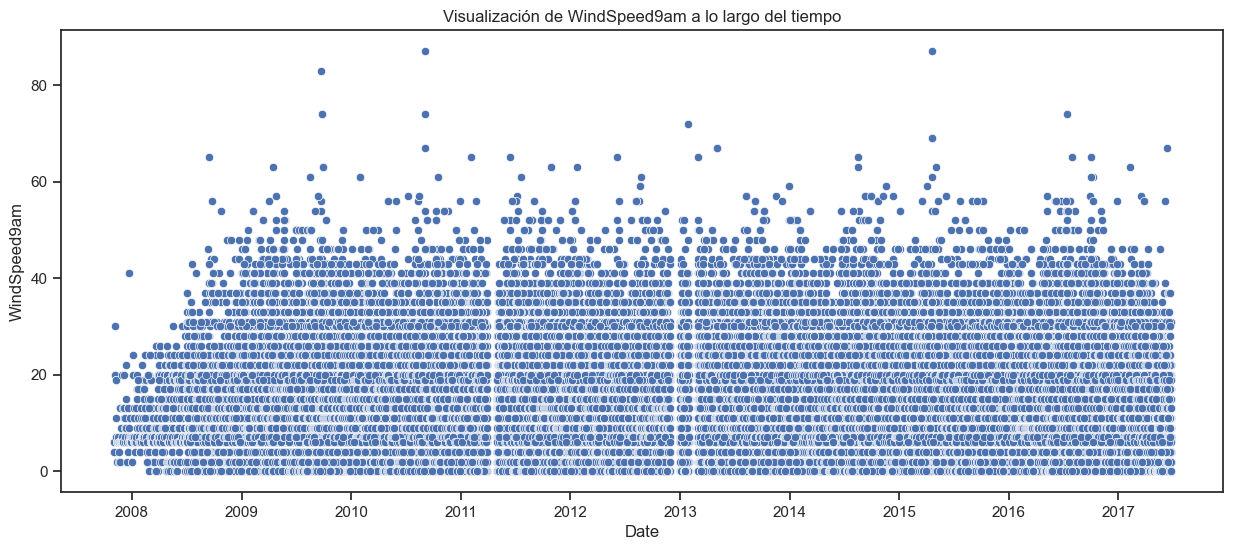

In [34]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y='WindSpeed9am', data=df_limpio)
plt.title('Visualización de WindSpeed9am a lo largo del tiempo')
plt.show()

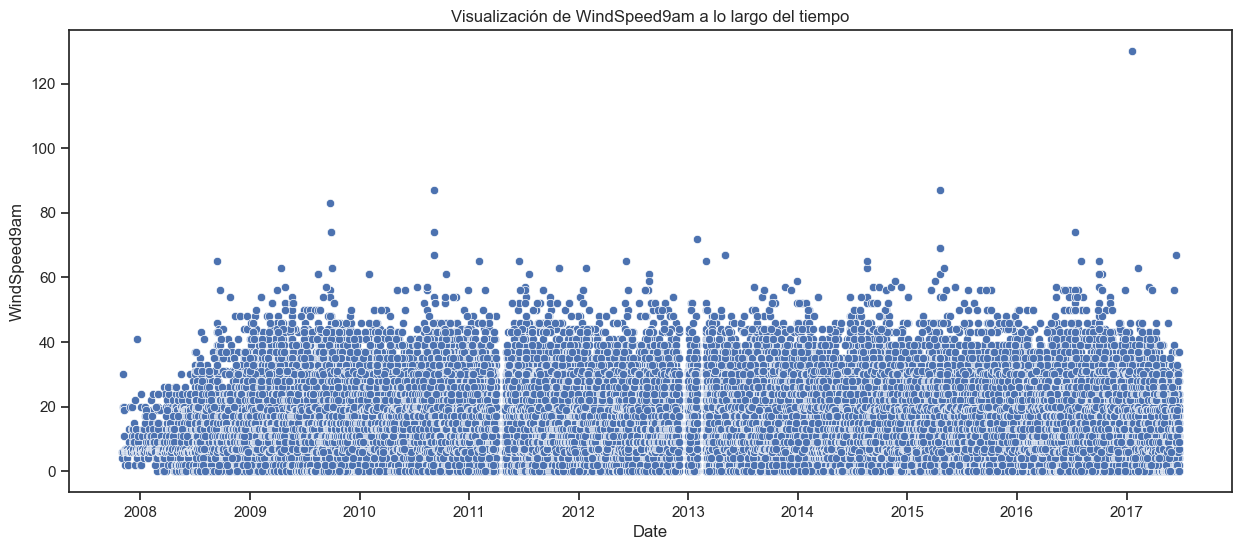

In [33]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y='WindSpeed9am', data=df)
plt.title('Visualización de WindSpeed9am a lo largo del tiempo')
plt.show()

Vemos como solo tiene un outlier

In [20]:
# Supongamos que df es tu DataFrame

# Define el umbral para eliminar los valores atípicos (por ejemplo, 100)
threshold = 100

# Identifica los valores atípicos en la columna 'Evaporation'
outliers = df['WindSpeed9am'] > threshold

# Elimina las filas con valores atípicos de la columna 'Evaporation'
df_limpio = df[~outliers]

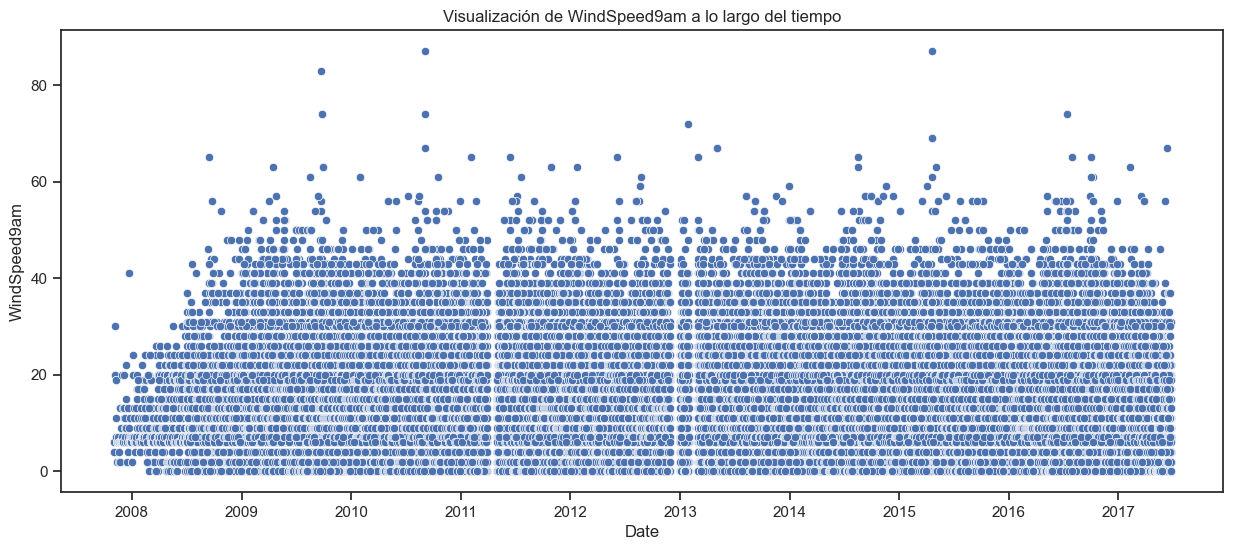

In [21]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y='WindSpeed9am', data=df_limpio)
plt.title('Visualización de WindSpeed9am a lo largo del tiempo')
plt.show()

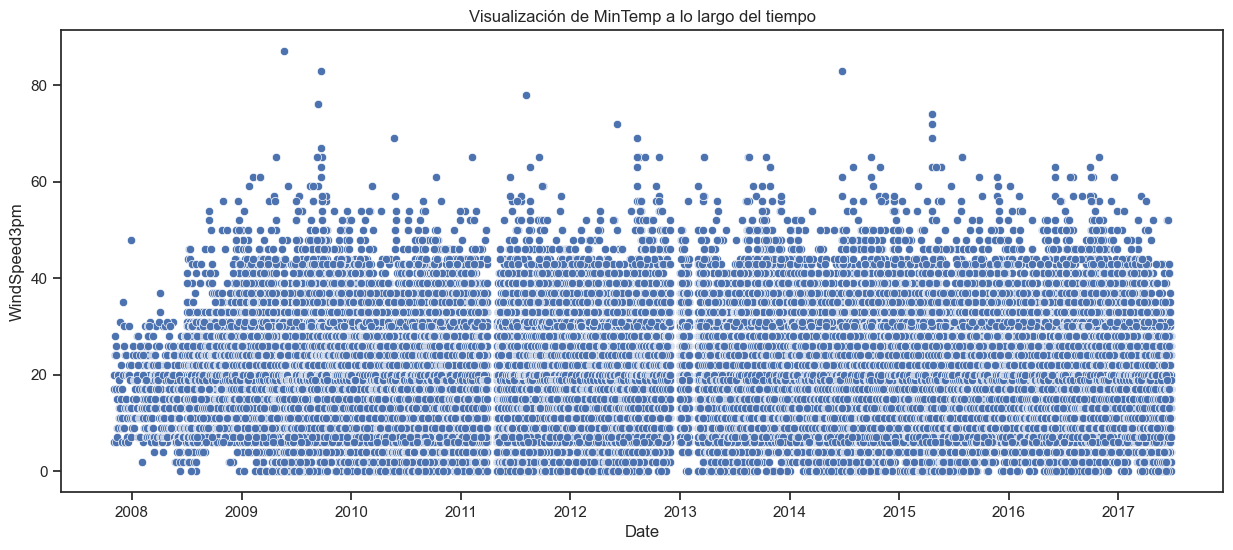

In [22]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y='WindSpeed3pm', data=df)
plt.title('Visualización de ' + columna + ' a lo largo del tiempo')
plt.show()

No tiene outliers

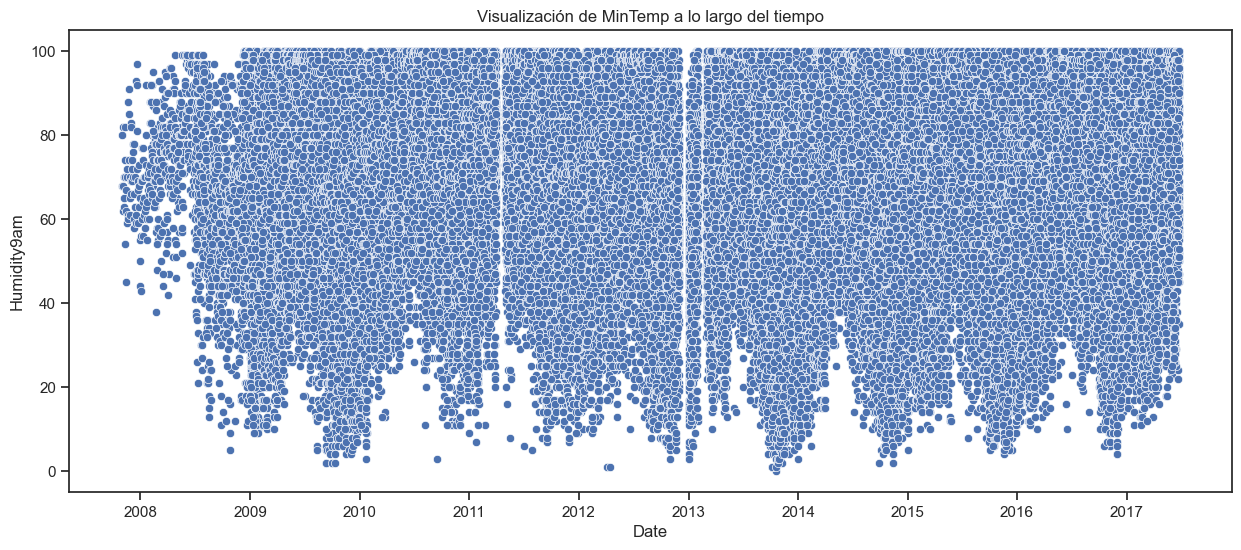

In [23]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y='Humidity9am', data=df)
plt.title('Visualización de ' + columna + ' a lo largo del tiempo')
plt.show()

No tiene outliers

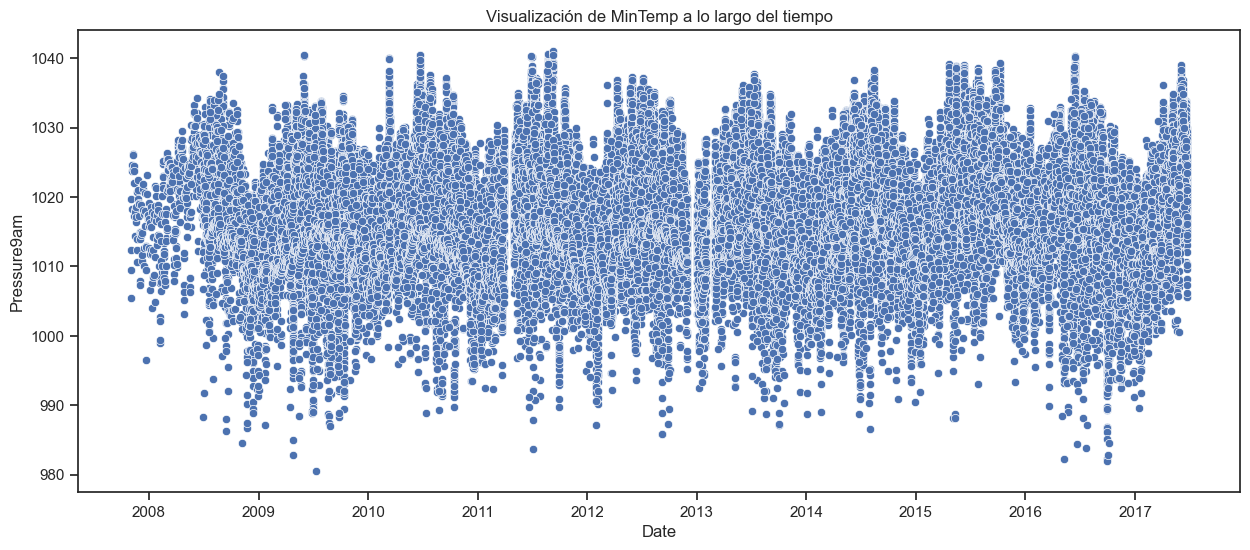

In [24]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y='Pressure9am', data=df)
plt.title('Visualización de ' + columna + ' a lo largo del tiempo')
plt.show()

No tiene outliers

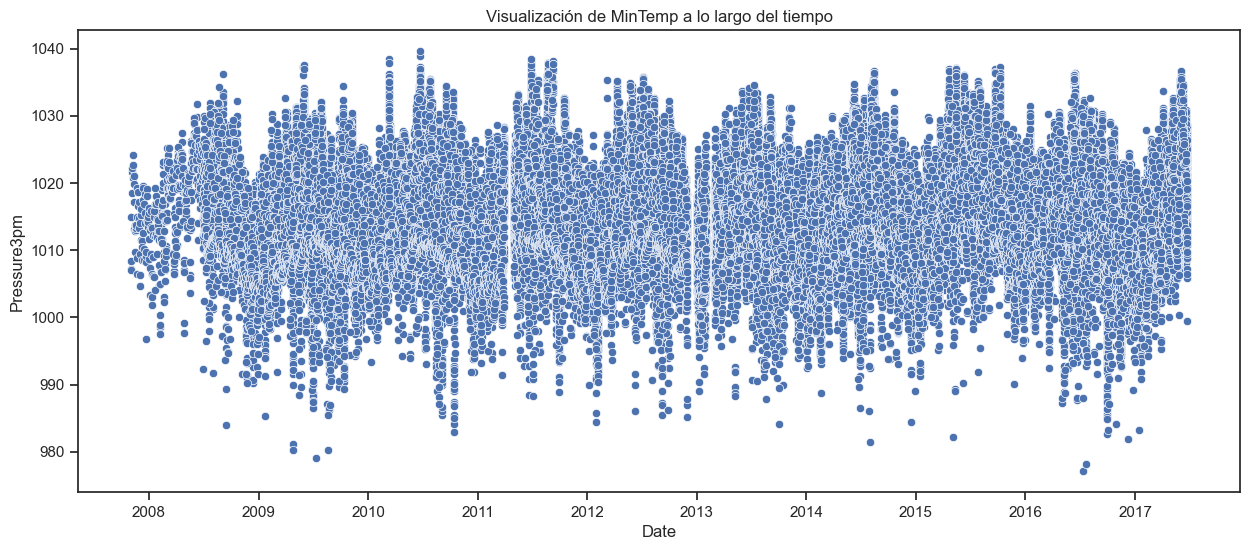

In [25]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y='Pressure3pm', data=df)
plt.title('Visualización de ' + columna + ' a lo largo del tiempo')
plt.show()

No tiene outliers

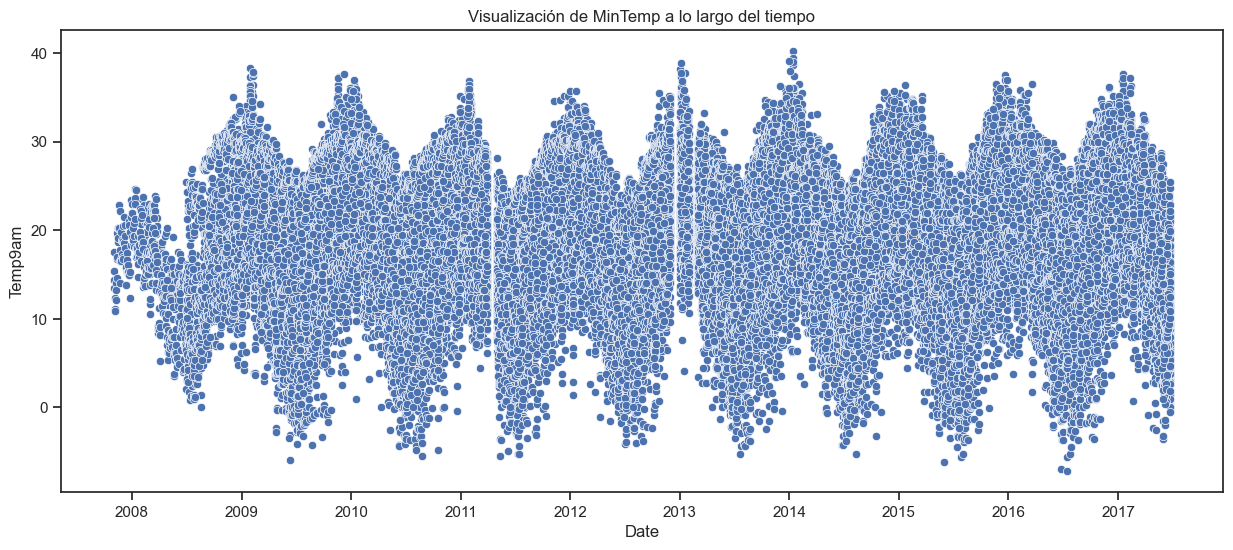

In [26]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y='Temp9am', data=df)
plt.title('Visualización de ' + columna + ' a lo largo del tiempo')
plt.show()

No tiene outliers

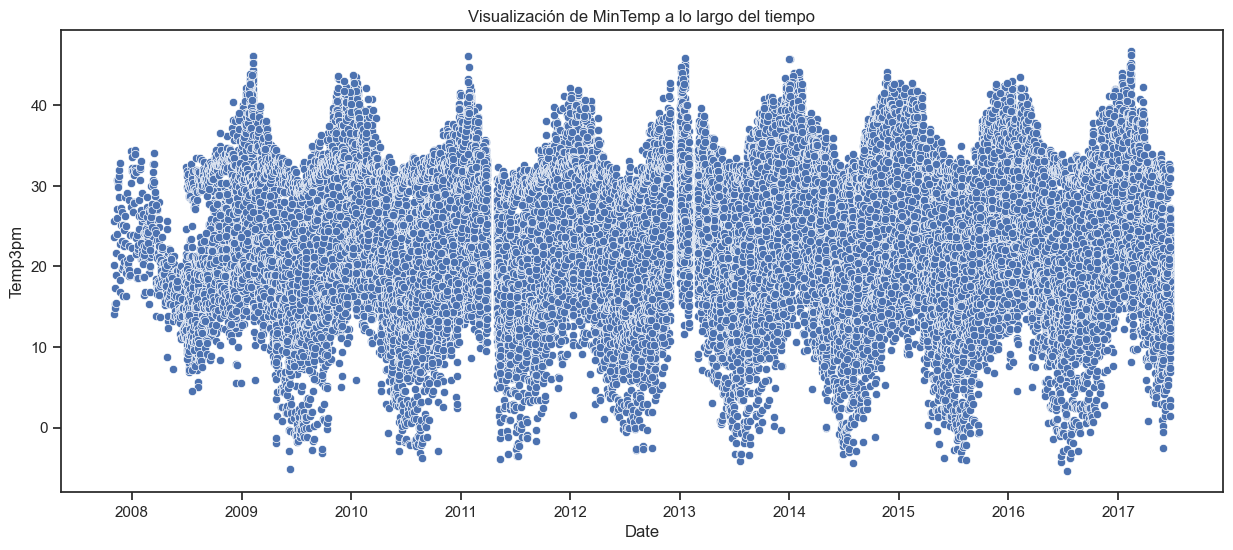

In [27]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Date', y='Temp3pm', data=df)
plt.title('Visualización de ' + columna + ' a lo largo del tiempo')
plt.show()

No tiene outliers

## Test

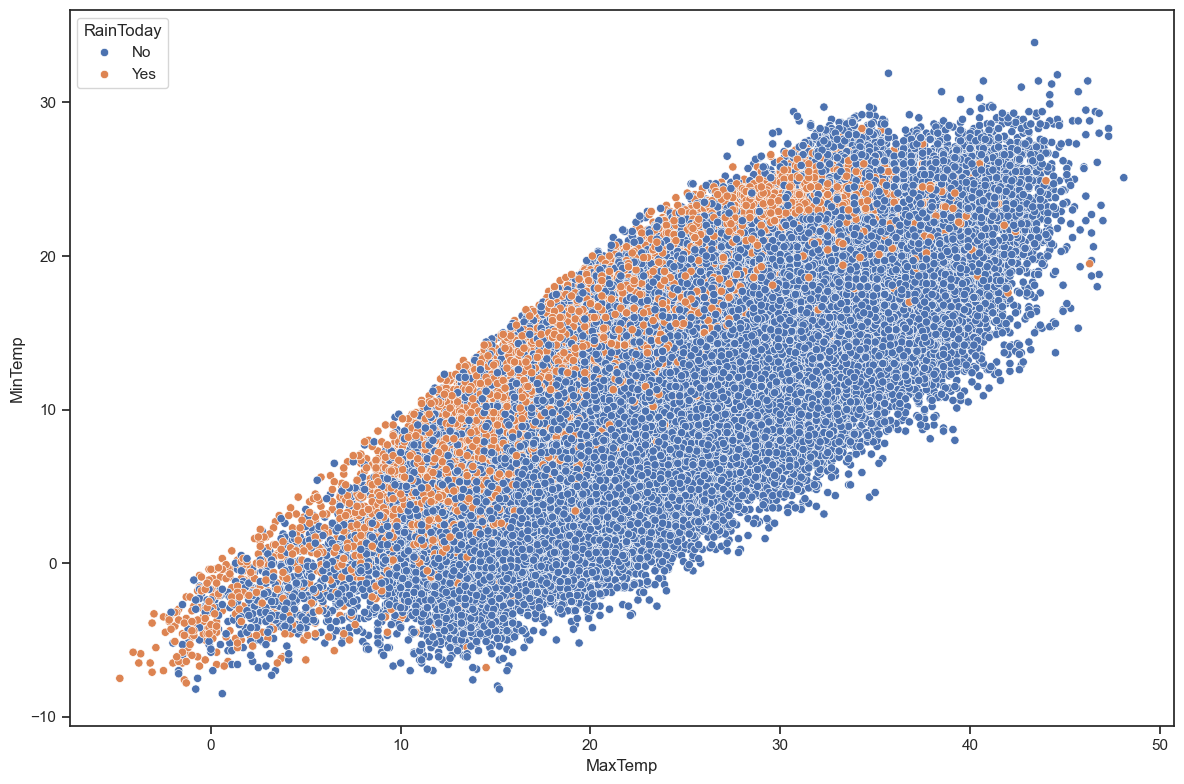

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainToday', data = df)
plt.tight_layout()
plt.show()

## Limpieza de datos